# Seaborn with Matplotlib (1)

## **1. seaborn + matplotlib**

+ seaborn을 matplotlib과 섞어쓰는 방법입니다.
+ 4부 중 첫 번째 시간입니다.
+ seborn 함수 중 matplotlib axes를 반화하는 함수들에 관한 내용입니다.

+ seaborn은 matplotlib을 쉽고 아름답게 쓰고자 만들어졌습니다.
    + 따라서 seaborn의 결과물은 당연히 matplotlib의 결과물입니다.
    + 그러나 간혹 seaborn이 그린 그림의 폰트, 색상에 접근이 되지 않아 난처합니다.
    + seaborn의 구조를 잘 이해하지 못하면 해결도 어렵습니다.
    

+ v0.11 기준으로 seaborn에는 다음 함수들이 있습니다.

![](https://user-images.githubusercontent.com/72365693/105783198-43710180-5fb9-11eb-8d01-11264a97a58b.png)


+ matplotlib의 출력물은 `figure`와 `axes`만을 반환합니다.
    + seaborn의 명령어 중 `axes`를 반환하는 것들은 matplotlib과 섞어 쓰기 좋습니다.
    + 먼저 matplotlib의 **객체지향**`object oriented` **interface**를 사용해서 그림의 틀을 만든 뒤,
    + 특정 `axes`에 seaborn을 삽입하면 됩니다.
    + **결론적으로, 하고 싶은 거 다 됩니다.**

### **1.1 Load data** 

+ 예제로 사용할 펭귄 데이터를 불러옵니다.
+ seaborn에 내장되어 있습니다.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### **1.2 `figure` and `axes`**

+ matplotlib으로 도화지 `figure`를 깔고 축공간 `axes`를 만듭니다.
+ 1 x 2 축공간을 구성합니다.

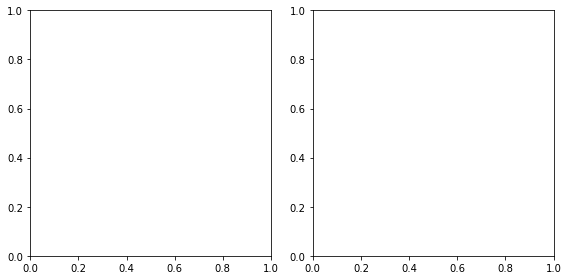

In [2]:
fig, axes = plt.subplots(ncols = 2, figsize = (8,4))

fig.tight_layout()

### **1.3 plot with matplotlib**

+ matplotlib 기능을 이용해서 산점도를 그립니다.
    + x축은 부리길이 `bill length`
    + y축은 부리 위 아래 두께 `bill depth`
    + 색상은 종 `species`로 합니다.
        Adelie,Chinstrap,Gentoo이 있습니다.

+ 두 축공간 중 왼쪽에만 그립니다.

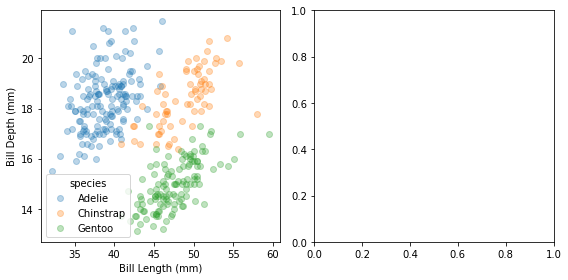

In [3]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 4))

species_u = penguins["species"].unique()

# plot 0 : matplotlib
for i, s in enumerate(species_u):
    axes[0].scatter(penguins["bill_length_mm"].loc[penguins["species"]==s],
                   penguins["bill_depth_mm"].loc[penguins["species"]==s],
                   c=f"C{i}", label=s, alpha=0.3
                  )
axes[0].legend(species_u, title="species")
axes[0].set_xlabel("Bill Length (mm)")
axes[0].set_ylabel("Bill Depth (mm)")

fig.tight_layout()

### **1.4 plot with seaborn**

+ 이번엔 같은 plot을 seaborn으로 그려봅니다.
+ 위 코드에 아래 세줄만 추가합니다.

Text(288.49090909090904, 0.5, 'Bill Depth (mm)')

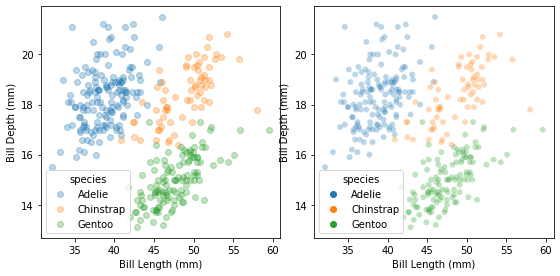

In [20]:


fig, axes = plt.subplots(ncols=2, figsize=(8, 4))

species_u = penguins["species"].unique()

# plot 0 : matplotlib
for i, s in enumerate(species_u):
    axes[0].scatter(penguins["bill_length_mm"].loc[penguins["species"]==s],
                   penguins["bill_depth_mm"].loc[penguins["species"]==s],
                   c=f"C{i}", label=s, alpha=0.3
                  )
axes[0].legend(species_u, title="species")
axes[0].set_xlabel("Bill Length (mm)")
axes[0].set_ylabel("Bill Depth (mm)")

fig.tight_layout()

# plot 1 : seaborn
sns.scatterplot("bill_length_mm", "bill_depth_mm", hue="species", data=penguins, alpha=0.3, ax=axes[1])
axes[1].set_xlabel("Bill Length (mm)")
axes[1].set_ylabel("Bill Depth (mm)")



+ 단 세 줄로 거의 동일한 그림이 나왔습니다.
    + scatter plot의 점 크기만 살짝 찍습니다.
    + label의 투명도만 살짝 다릅니다.
 

+ seaborn 명령 `scatterplot()`을 그래로 사용했습니다.
+ x축과 y축 label도 바꾸었습니다.
    + `ax=axes[1]` 인자에서 볼 수 있듯, 존재하는 `axes`에 그림만 얹었습니다.
    + **matplotlib틀 + seaborn 그림**이므로, matplotlib 명령이 모두 통합니다.

### **1.5 matplotlib + seaborn & seaborn + matplotlib**

+ matplotlib과 seaborn이 자유롭게 섞일 수 있습니다.
    + **matplotlib 산점도 위에 seaborn 추세선**을 얹을 수 있고,
    + **seaborn 산점도 위에 matplotlib 중심점**을 얹을 수 있습니다.

+ 파이썬 코드는 다음과 같습니다.

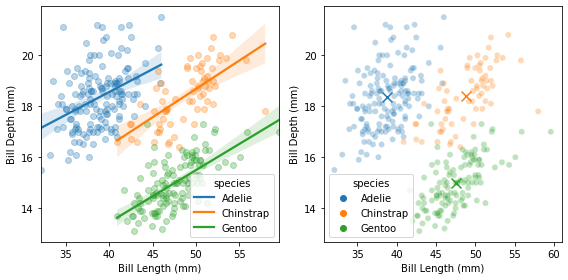

In [15]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 4))

species_u = penguins["species"].unique()

# plot 0 : matplotlib + seaborn
for i, s in enumerate(species_u):
    # matplotlib 산점도
    axes[0].scatter(penguins["bill_length_mm"].loc[penguins["species"]==s],
                   penguins["bill_depth_mm"].loc[penguins["species"]==s],
                   c=f"C{i}", label=s, alpha=0.3
                  )
				  
    # seaborn 추세선
    sns.regplot("bill_length_mm", "bill_depth_mm", data=penguins.loc[penguins["species"]==s], 
                scatter=False, ax=axes[0])
    
axes[0].legend(species_u, title="species")
axes[0].set_xlabel("Bill Length (mm)")
axes[0].set_ylabel("Bill Depth (mm)")

# plot 1 : seaborn + matplotlib
# seaborn 산점도
sns.scatterplot("bill_length_mm", "bill_depth_mm", hue="species", data=penguins, alpha=0.3, ax=axes[1])
axes[1].set_xlabel("Bill Length (mm)")
axes[1].set_ylabel("Bill Depth (mm)")

for i, s in enumerate(species_u):
    # matplotlib 중심점
    axes[1].scatter(penguins["bill_length_mm"].loc[penguins["species"]==s].mean(),
                   penguins["bill_depth_mm"].loc[penguins["species"]==s].mean(),
                   c=f"C{i}", alpha=1, marker="x", s=100
                  )

fig.tight_layout()

warnings.filterwarnings(action='ignore') # 경고 메시지 끄기
# warnings.filterwarnings(action='default') 경고 메시지 생성

### **1.6 seaborn + seaborn + matplotlib**

+ 안 될 이유가 없습니다.
+ seaborn `scatterplot` + seaborn `kdeplot` + matplotlib `text` 입니다.

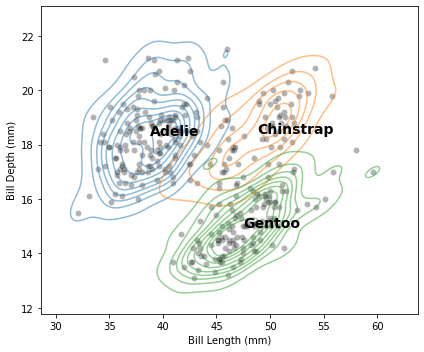

In [19]:
fig, ax = plt.subplots(figsize=(6,5))

# plot 0: scatter plot
sns.scatterplot("bill_length_mm", "bill_depth_mm", color="k", data=penguins, alpha=0.3, ax=ax, legend=False)

# plot 1: kde plot
sns.kdeplot("bill_length_mm", "bill_depth_mm", hue="species", data=penguins, alpha=0.5, ax=ax, legend=False)

# text:
species_u = penguins["species"].unique()
for i, s in enumerate(species_u):
    ax.text(penguins["bill_length_mm"].loc[penguins["species"]==s].mean(),
            penguins["bill_depth_mm"].loc[penguins["species"]==s].mean(),
            s = s, fontdict={"fontsize":14, "fontweight":"bold","color":"k"}
            )

ax.set_xlabel("Bill Length (mm)")
ax.set_ylabel("Bill Depth (mm)")

fig.tight_layout()

### **1.7 결론**

+ **seaborn을 matplotlib과 마음껏 섞어쓰세요**
+ **단, `axes`를 반환하는 명령어에 한해서 말입니다.** 
+ 이런 명령어를 `axes-level function` 이라고 합니다.

[출처](https://jehyunlee.github.io/2020/09/30/Python-DS-34-seaborn_matplotlib/)